# Vehicle Ownership in LA

Name: Qingyang Xu

Data resouce: Social Explorer American Community Survey (ACS) 2018--2022 (5-Year-Estimates); Los Angeles Traffic Collisio (2018-2022)ar

In [9]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import folium 

In [10]:
df = pd.read_csv('Week04/Data/R13562228_SL140.csv')

In [11]:
df = pd.read_csv(
    'Week04/Data/R13562228_SL140.csv',
    dtype=
    {
        'Geo_FIPS':str,
        'Geo_STATE':str,
        'Geo_COUNTY': str
    }
)
df.head()

,Geo_FIPS,Geo_QName,Geo_STUSAB,Geo_SUMLEV,Geo_GEOCOMP,Geo_US,Geo_REGION,Geo_DIVISION,Geo_STATE,Geo_COUNTY,...,SE_A10054B_004,SE_A10054B_005,SE_A10054B_006,SE_A10054B_007,PCT_SE_A10054B_002,PCT_SE_A10054B_003,PCT_SE_A10054B_004,PCT_SE_A10054B_005,PCT_SE_A10054B_006,PCT_SE_A10054B_007
0,06001400100,"Census Tract 4001, Alameda County, California",ca,140,0,NaN,NaN,NaN,06,001,...,45,0,0,26,0.00,44.09,35.43,0.00,0.00,20.47
1,06001400200,"Census Tract 4002, Alameda County, California",ca,140,0,NaN,NaN,NaN,06,001,...,70,0,3,0,19.69,61.40,18.13,0.00,0.78,0.00
2,06001400300,"Census Tract 4003, Alameda County, California",ca,140,0,NaN,NaN,NaN,06,001,...,247,62,0,10,19.57,61.56,14.61,3.67,0.00,0.59
3,06001400400,"Census Tract 4004, Alameda County, California",ca,140,0,NaN,NaN,NaN,06,001,...,213,108,0,0,22.44,41.38,24.01,12.18,0.00,0.00
4,06001400500,"Census Tract 4005, Alameda County, California",ca,140,0,NaN,NaN,NaN,06,001,...,278,12,42,0,16.29,45.90,31.66,1.37,4.78,0.00


In [12]:
df = df.dropna(axis=1,how="all")
columns_to_keep = ['Geo_FIPS',
                   'SE_A10054B_001',
                   'SE_A10054B_002',
                   'SE_A10054B_003',
                   'SE_A10054B_004',
                   'SE_A10054B_005',
                   'SE_A10054B_006',
                   'SE_A10054B_007']
df2 = df[columns_to_keep]
df2.columns = ['FIPS',
'Renter-Occupied_Housing_Units',
'No_Vehicle_Available',
'1_Vehicle_Available',
'2_Vehicle_Available',
'3_Vehicle_Available',
'4_Vehicle_Available',
'5_or_More_Vehicles_Available']
df2.sample(5)

,FIPS,Renter-Occupied_Housing_Units,No_Vehicle_Available,1_Vehicle_Available,2_Vehicle_Available,3_Vehicle_Available,4_Vehicle_Available,5_or_More_Vehicles_Available
5575,06067005502,1346,213,592,391,104,46,0
4991,06065031703,495,12,179,128,76,82,18
5387,06065045502,771,89,357,271,54,0,0
6292,06071011405,272,0,177,71,24,0,0
8923,06111003616,425,8,126,212,33,46,0


In [13]:
tracts=gpd.read_file('Week04/Data/Census_Tracts_2020.geojson')
tracts.head()

,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28492 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28198 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


In [14]:
tracts['FIPS'] ='06' + '037' + tracts['CT20']
tracts_vehicle=tracts.merge(df2,on="FIPS")

<Axes: >

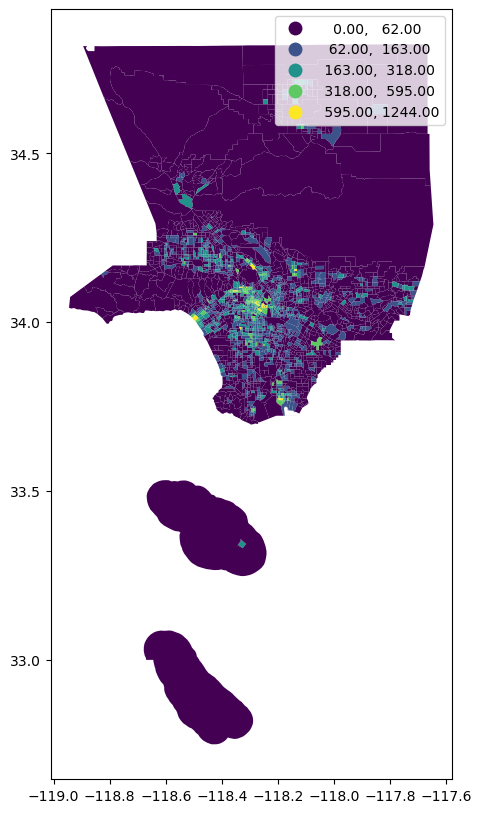

In [15]:
# create choropleth maps in geopandas (No_Vehicle)
tracts_vehicle.plot(figsize=(12,10),
                 column='No_Vehicle_Available',
                 legend=True, 
                 scheme='NaturalBreaks')

<Axes: >

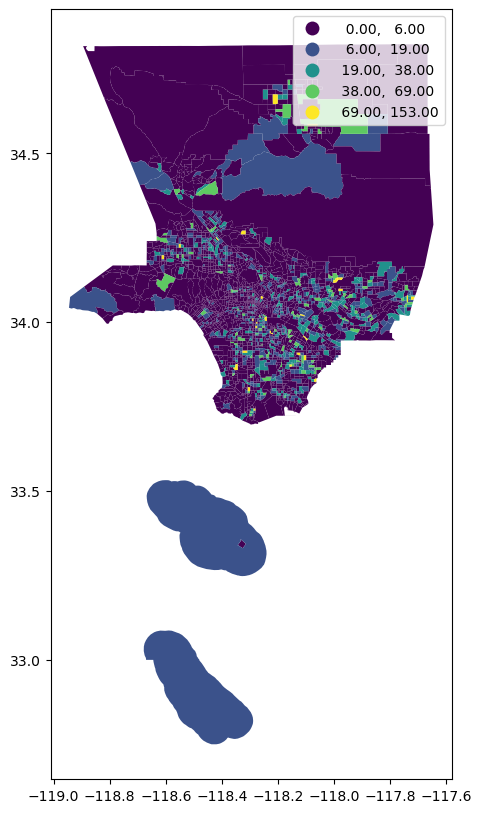

In [16]:
# create choropleth maps in geopandas (Most_Vehicle)
tracts_vehicle.plot(figsize=(12,10),
                 column='5_or_More_Vehicles_Available',
                 legend=True, 
                 scheme='NaturalBreaks')

## Now let's import the Collision Data, and try to load both onto the same map.

In [17]:
Collision = pd.read_csv('Data/Traffic_Collision_Data_2018_to_2022.csv')
Collision.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location
0,180104039,01/01/2018,01/01/2018,1740,1,Central,192,997,TRAFFIC COLLISION,3101 3401 3701 3009 3025 3036,50.0,F,O,101.0,STREET,VENICE BL,GRAND AV,"(34.0363, -118.2677)"
1,180104668,01/10/2018,01/01/2018,1540,1,Central,182,997,TRAFFIC COLLISION,3101 3401 3701 3004 3030,NaN,M,W,101.0,STREET,VERDUGO RD,YUKON,"(34.042, -118.2625)"
2,180104040,01/01/2018,01/01/2018,1900,1,Central,154,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030 3032,25.0,M,W,108.0,PARKING LOT,SPRING,6TH,"(34.046, -118.2509)"
3,180104001,01/01/2018,01/01/2018,38,1,Central,192,997,TRAFFIC COLLISION,3101 3401 3701 3002 3011 3034 3036,NaN,M,H,101.0,STREET,GRAND,WASHINGTON,"(34.0327, -118.2683)"
4,180104044,01/01/2018,01/01/2018,1030,1,Central,182,997,TRAFFIC COLLISION,3101 3401 3701 3004 3026 3036,33.0,M,B,101.0,STREET,HOPE,PICO,"(34.0395, -118.2656)"


In [18]:
# Import the shapely module from the GeoPandas library.
from shapely.geometry import Point

In [19]:
# Define a function to transform coordinate points.
def parse_location(location_str):
    try:
        lat, lon = map(float, location_str.strip("()").split(", "))
        return Point(lon, lat)
    except:
        return None

In [20]:
# Apply the function
Collision['geometry'] = Collision['Location'].apply(parse_location)

# Remove unneeded lines
Collision = Collision.dropna(subset=['geometry'])

## Harmonize the coordinate system and remove points that do not make sense.

In [21]:
# Convert data into GeoPandas format (geographic data).
gdf_tracts_vehicle = gpd.GeoDataFrame(tracts_vehicle, geometry='geometry')
gdf_Collision = gpd.GeoDataFrame(Collision, geometry='geometry')

# Set up and harmonize coordinate systems.
gdf_tracts_vehicle.set_crs(epsg=4326, inplace=True)
gdf_Collision.set_crs(epsg=4326, inplace=True)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,Victim Age,Victim Sex,Victim Descent,Premise Code,Premise Description,Address,Cross Street,Location,geometry
0,180104039,01/01/2018,01/01/2018,1740,1,Central,192,997,TRAFFIC COLLISION,3101 3401 3701 3009 3025 3036,50.0,F,O,101.0,STREET,VENICE BL,GRAND AV,"(34.0363, -118.2677)",POINT (-118.26770 34.03630)
1,180104668,01/10/2018,01/01/2018,1540,1,Central,182,997,TRAFFIC COLLISION,3101 3401 3701 3004 3030,NaN,M,W,101.0,STREET,VERDUGO RD,YUKON,"(34.042, -118.2625)",POINT (-118.26250 34.04200)
2,180104040,01/01/2018,01/01/2018,1900,1,Central,154,997,TRAFFIC COLLISION,3101 3401 3701 3006 3030 3032,25.0,M,W,108.0,PARKING LOT,SPRING,6TH,"(34.046, -118.2509)",POINT (-118.25090 34.04600)
3,180104001,01/01/2018,01/01/2018,38,1,Central,192,997,TRAFFIC COLLISION,3101 3401 3701 3002 3011 3034 3036,NaN,M,H,101.0,STREET,GRAND,WASHINGTON,"(34.0327, -118.2683)",POINT (-118.26830 34.03270)
4,180104044,01/01/2018,01/01/2018,1030,1,Central,182,997,TRAFFIC COLLISION,3101 3401 3701 3004 3026 3036,33.0,M,B,101.0,STREET,HOPE,PICO,"(34.0395, -118.2656)",POINT (-118.26560 34.03950)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191366,230204688,12/31/2022,12/31/2022,1240,2,Rampart,218,997,TRAFFIC COLLISION,0605 3030 4024,35.0,M,O,101.0,STREET,1500 W SUNSET BL,NaN,"(34.0758, -118.2552)",POINT (-118.25520 34.07580)
191367,230904001,01/01/2023,12/31/2022,2225,9,Van Nuys,964,997,TRAFFIC COLLISION,3038 3602 3101 3004 3026 4026 3029 3037,58.0,M,W,101.0,STREET,WOODMAN AV,ADDISON ST,"(34.1612, -118.4315)",POINT (-118.43150 34.16120)
191368,222019939,12/31/2022,12/31/2022,1240,20,Olympic,2076,997,TRAFFIC COLLISION,3006 3028 3030 4027 3034 3037 3101 3401 3701,22.0,NaN,NaN,101.0,STREET,VERMONT AV,WASHINGTON BL,"(34.04, -118.2916)",POINT (-118.29160 34.04000)
191369,230106871,12/31/2022,12/31/2022,1225,1,Central,162,997,TRAFFIC COLLISION,0605 3030 4024,47.0,M,W,101.0,STREET,W 8TH ST,S OLIVE ST,"(34.0452, -118.2569)",POINT (-118.25690 34.04520)


In [22]:
# Filter out invalid coordinate points
gdf_Collision = gdf_Collision[(gdf_Collision.geometry.x != 0) & (gdf_Collision.geometry.y != 0)]

<Axes: >

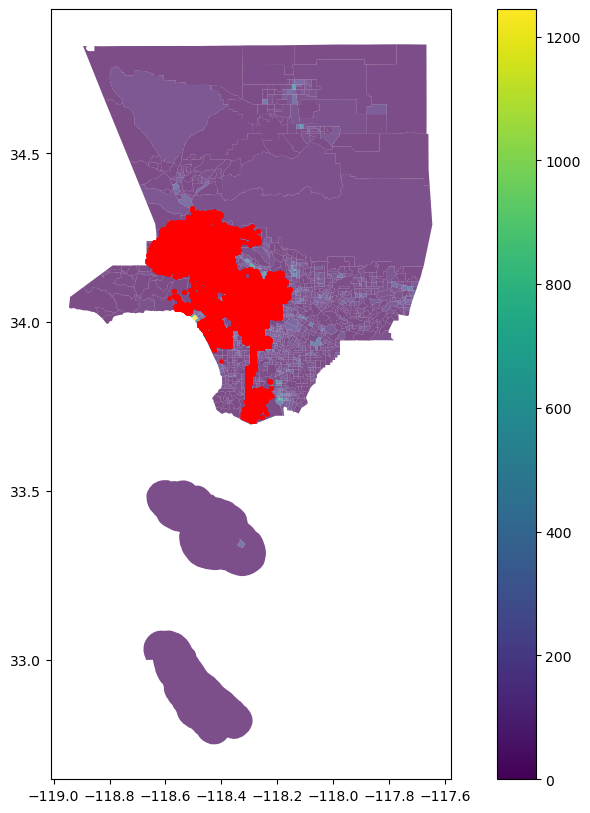

In [23]:
# Creation of maps combining car ownership distribution and collision points
fig, ax = plt.subplots(figsize=(12, 10))
gdf_tracts_vehicle.plot(ax=ax, column='No_Vehicle_Available', legend=True, alpha=0.7)  # Car ownership (No_Vehicle) distribution map
gdf_Collision.plot(ax=ax, color='red', markersize=5)    # Map of collision points

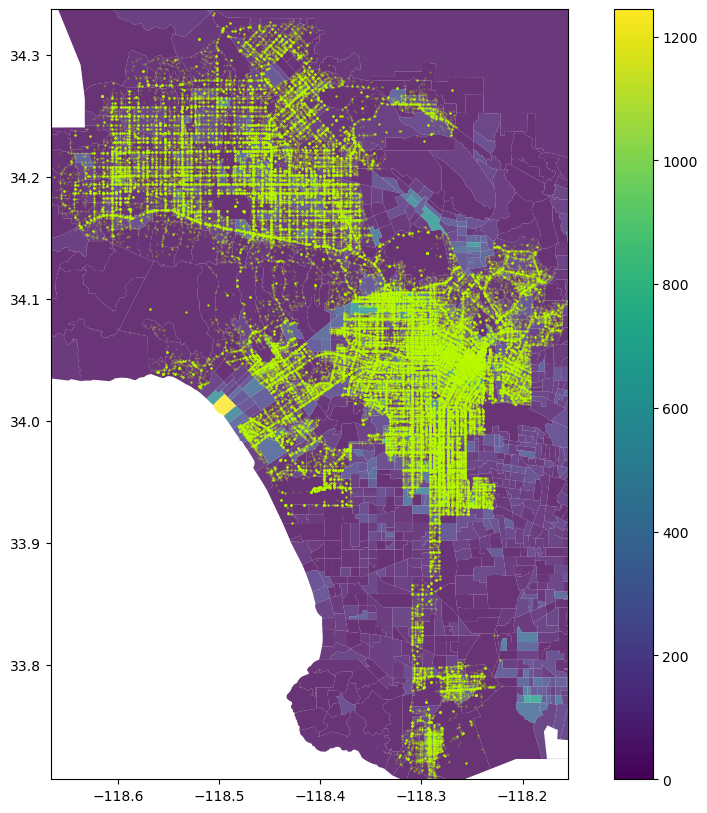

In [55]:
# Adjusts the view range to the coordinate point range of the collision data.
fig, ax = plt.subplots(figsize=(12, 10))
gdf_tracts_vehicle.plot(ax=ax, column='No_Vehicle_Available', legend=True, alpha=0.8)  # Car ownership (No_Vehicle) distribution map
gdf_Collision.plot(ax=ax, color=(0.75, 1, 0), markersize=0.3, alpha=0.2)    # Map of collision points

gdf_Collision_bounds = gdf_Collision.total_bounds

ax.set_xlim([gdf_Collision_bounds[0], gdf_Collision_bounds[2]])
ax.set_ylim([gdf_Collision_bounds[1], gdf_Collision_bounds[3]])


plt.show()

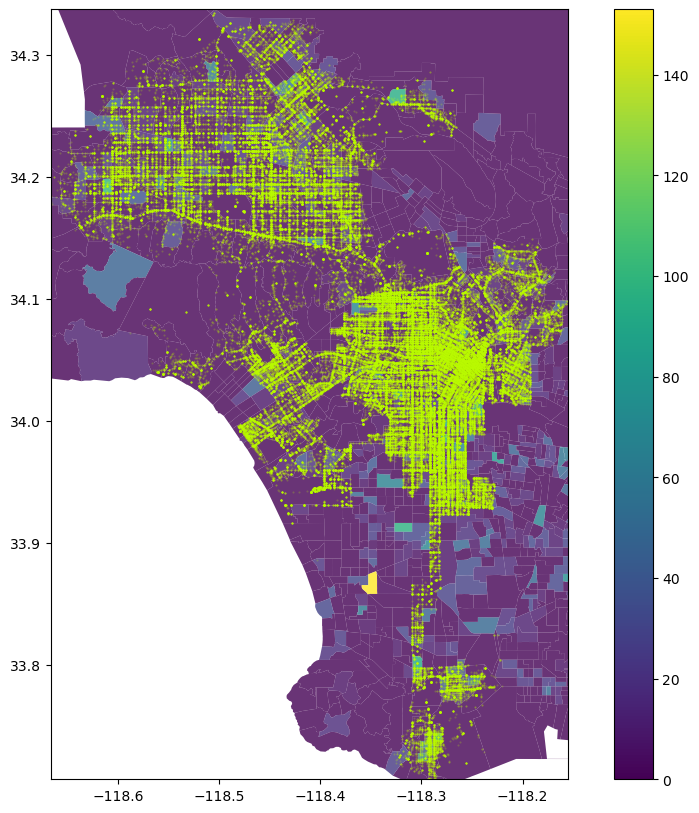

In [56]:
# Create a map of another group (Most_Vehicle) in the same way
fig, ax = plt.subplots(figsize=(12, 10))
gdf_tracts_vehicle.plot(ax=ax, column='5_or_More_Vehicles_Available', legend=True, alpha=0.8)  # Car ownership (Most_Vehicle) distribution map
gdf_Collision.plot(ax=ax, color=(0.75, 1, 0), markersize=0.3, alpha=0.2)    # Map of collision points

gdf_Collision_bounds = gdf_Collision.total_bounds

ax.set_xlim([gdf_Collision_bounds[0], gdf_Collision_bounds[2]])
ax.set_ylim([gdf_Collision_bounds[1], gdf_Collision_bounds[3]])


plt.show()